In [116]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Sequence modelling 

## Coding tutorials
 #### [1.  The IMDb dataset](#coding_tutorial_1)
 #### [2. Padding and masking sequence data](#coding_tutorial_2)
 #### [3. The Embedding layer](#coding_tutorial_3)
 #### [4. The Embedding Projector](#coding_tutorial_4)
 #### [5. Recurrent neural network layers](#coding_tutorial_5)
 #### [6. Stacked RNNs and the Bidirectional wrapper](#coding_tutorial_6)

***
<a id="coding_tutorial_1"></a>
## The IMDb Dataset

#### Load the IMDB review sentiment dataset

In [2]:
# Import imdb

import tensorflow.keras.datasets.imdb as imdb

In [3]:
# Download and assign the data set using load_data()

(x_train, y_train), (x_test, y_test) =imdb.load_data()

17465344/17464789 [==============================] - 0s 0us/step


#### Inspect the dataset

In [4]:
# Inspect the type of the data

type(x_train)

numpy.ndarray

In [5]:
# Inspect the shape of the data

x_train.shape

(25000,)

In [6]:
# Display the first dataset element input
# Notice encoding

x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [7]:
# Display the first dataset element output

y_train[0]

1

#### Load dataset with different options

In [ ]:
# Load the dataset with defaults

imdb.load_data(path='imdb.npz'
              index_form=3)
# ~/.keras/dataset/

In [ ]:
# Limit the vocabulary to the top 500 words using num_words

imdb.load_data(num_words=1000)

In [ ]:
# Ignore the top 10 most frequent words using skip_top

imdb.load_data(skip_top=10, num_words=1000, oov_char=2)

In [ ]:
# Limit the sequence lengths to 500 using maxlen

imdb.load_data(maxlen=500)

In [ ]:
# Use '1' as the character that indicates the start of a sequence

imdb.load_data(start_char=1)

#### Explore the dataset word index

In [46]:
# Load the imdb word index using get_word_index()

imdb_word_index = imdb.get_word_index()

In [47]:
# View the word index as a dictionary,
# accounting for index_from.

index_form = 3
imdb_word_index = {key: value +index_form for key, value in imdb_word_index.items()}

In [48]:
# Retrieve a specific word's index

print(imdb_word_index['simpsonian'], imdb_word_index['the'])
len(x_train[0]), index_form

52256 4


(218, 3)

In [49]:
# View an input sentence
#它先取得index的key值,也就是'the'等等, 再從dataset裡抓每個key的index比the小的
inv_imdb_word_index = {value: key for key, value in imdb_word_index.items()}
[inv_imdb_word_index[index] for index in x_train[0] if index > index_form]

['this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction',
 "everyone's",
 'really',
 'suited',
 'the',
 'part',
 'they',
 'played',
 'and',
 'you',
 'could',
 'just',
 'imagine',
 'being',
 'there',
 'robert',
 "redford's",
 'is',
 'an',
 'amazing',
 'actor',
 'and',
 'now',
 'the',
 'same',
 'being',
 'director',
 "norman's",
 'father',
 'came',
 'from',
 'the',
 'same',
 'scottish',
 'island',
 'as',
 'myself',
 'so',
 'i',
 'loved',
 'the',
 'fact',
 'there',
 'was',
 'a',
 'real',
 'connection',
 'with',
 'this',
 'film',
 'the',
 'witty',
 'remarks',
 'throughout',
 'the',
 'film',
 'were',
 'great',
 'it',
 'was',
 'just',
 'brilliant',
 'so',
 'much',
 'that',
 'i',
 'bought',
 'the',
 'film',
 'as',
 'soon',
 'as',
 'it',
 'was',
 'released',
 'for',
 'retail',
 'and',
 'would',
 'recommend',
 'it',
 'to',
 'everyone',
 'to',
 'watch',
 'and',
 'the',
 'fly',
 'fishing',
 'was',
 'amazing',
 'really',
 'cried',
 'at',
 'the',


In [50]:
# Get the sentiment value

y_train[0]

1

---
<a id="coding_tutorial_2"></a>
## Padding and Masking Sequence Data

In [52]:
# Load the imdb data set

import tensorflow.keras.datasets.imdb as imdb
(x_train, y_train),(x_test, y_test) = imdb.load_data()

#### Preprocess the data with padding

In [54]:
# Inspect the input data shape

x_train.shape

(25000,)

In [58]:
# Pad the inputs to the maximum length using maxlen

padded_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=300, padding='post', truncating='pre')

In [60]:
# Inspect the output data shape

padded_x_train.shape, padded_x_train[0]

((25000, 300),
 array([    1,    14,    22,    16,    43,   530,   973,  1622,  1385,
           65,   458,  4468,    66,  3941,     4,   173,    36,   256,
            5,    25,   100,    43,   838,   112,    50,   670, 22665,
            9,    35,   480,   284,     5,   150,     4,   172,   112,
          167, 21631,   336,   385,    39,     4,   172,  4536,  1111,
           17,   546,    38,    13,   447,     4,   192,    50,    16,
            6,   147,  2025,    19,    14,    22,     4,  1920,  4613,
          469,     4,    22,    71,    87,    12,    16,    43,   530,
           38,    76,    15,    13,  1247,     4,    22,    17,   515,
           17,    12,    16,   626,    18, 19193,     5,    62,   386,
           12,     8,   316,     8,   106,     5,     4,  2223,  5244,
           16,   480,    66,  3785,    33,     4,   130,    12,    16,
           38,   619,     5,    25,   124,    51,    36,   135,    48,
           25,  1415,    33,     6,    22,    12,   215,    28

#### Create a Masking layer

In [61]:
# Import numpy 

import numpy as np

In [62]:
# Masking expects to see (batch, sequence, features)
# Create a dummy feature dimension using expand_dims

padded_x_train = np.expand_dims(padded_x_train, -1)

In [63]:
# Create a Masking layer 

tf_x_train = tf.convert_to_tensor(padded_x_train, dtype='float32')
masking_layer = tf.keras.layers.Masking(mask_value=0.0)

In [64]:
# Pass tf_x_train to it

masked_x_train = masking_layer(tf_x_train)

In [65]:
# Look at the dataset

tf_x_train

<tf.Tensor: id=0, shape=(25000, 300, 1), dtype=float32, numpy=
array([[[1.000e+00],
        [1.400e+01],
        [2.200e+01],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.940e+02],
        [1.153e+03],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.400e+01],
        [4.700e+01],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       ...,

       [[1.000e+00],
        [1.100e+01],
        [6.000e+00],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.446e+03],
        [7.079e+03],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.700e+01],
        [6.000e+00],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]]], dtype=float32)>

In [66]:
# Look at the ._keras_mask for the dataset

masked_x_train._keras_mask

<tf.Tensor: id=8, shape=(25000, 300), dtype=bool, numpy=
array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])>

***
<a id="coding_tutorial_3"></a>
## The Embedding layer

#### Create and apply an `Embedding` layer

In [68]:
# Create an embedding layer using layers.Embedding
# Specify input_dim, output_dim, input_length

embedding_layer = tf.keras.layers.Embedding(input_dim=501, output_dim=16)

In [70]:
# Inspect an Embedding layer output for a fixed input
# Expects an input of shape (batch, sequence, feature)

sequence_of_indices = tf.constant([[[0], [1], [5], [500]]])
sequence_of_embeddings = embedding_layer(sequence_of_indices)
sequence_of_embeddings

<tf.Tensor: id=24, shape=(1, 4, 1, 16), dtype=float32, numpy=
array([[[[-0.00603823, -0.00872837, -0.01537516,  0.01691324,
          -0.01813127,  0.01540865, -0.03214029, -0.038732  ,
           0.01811428,  0.04956882,  0.00400442,  0.01457213,
           0.01082819, -0.04819256, -0.03307819, -0.0070039 ]],

        [[ 0.00612045,  0.02400985,  0.00865788,  0.02338869,
          -0.01891493,  0.00613434, -0.04888427,  0.02852182,
          -0.01741872, -0.01183723, -0.02204701,  0.04301602,
           0.03706649,  0.03126993,  0.03943192, -0.0452759 ]],

        [[ 0.04403559, -0.00730234,  0.00052723, -0.04818898,
          -0.00168253, -0.03534492, -0.0472238 , -0.03073744,
           0.00095321,  0.02762636,  0.03785909,  0.0269787 ,
           0.01001754,  0.02602829, -0.02536464, -0.00125047]],

        [[-0.04696513, -0.02619135, -0.04888917, -0.00753375,
           0.04862568, -0.04988333,  0.03832276,  0.02016597,
           0.0421516 ,  0.02818913, -0.03982013, -0.03290044,

In [72]:
# Inspect the Embedding layer weights using get_weights()

embedding_layer.get_weights()[0]

array([[-0.00603823, -0.00872837, -0.01537516, ..., -0.04819256,
        -0.03307819, -0.0070039 ],
       [ 0.00612045,  0.02400985,  0.00865788, ...,  0.03126993,
         0.03943192, -0.0452759 ],
       [-0.01787842,  0.01254174,  0.03512741, ..., -0.00323973,
        -0.00731238, -0.00323236],
       ...,
       [-0.00382398, -0.04356369,  0.04811345, ..., -0.04312883,
        -0.04041732, -0.02331456],
       [ 0.03369956, -0.02946422,  0.00954254, ..., -0.04071472,
        -0.0243718 ,  0.01530255],
       [-0.04696513, -0.02619135, -0.04888917, ..., -0.03715745,
        -0.03094682,  0.01288433]], dtype=float32)

In [74]:
# Get the embedding for the 14th index

embedding_layer.get_weights()[0][14, :]

array([ 0.03861464,  0.03239841,  0.03175851,  0.04991269, -0.03485073,
       -0.02108005,  0.00347707, -0.04086272,  0.0327337 ,  0.00646482,
        0.04625983, -0.03281381,  0.02171943,  0.03431528, -0.02109195,
       -0.00512606], dtype=float32)

#### Create and apply an `Embedding` layer that uses `mask_zero=True`

In [75]:
# Create a layer that uses the mask_zero kwarg

masking_embedding_layer = tf.keras.layers.Embedding(input_dim=501, output_dim=16, mask_zero=True)

In [77]:
# Apply this layer to the sequence and see the _keras_mask property

masked_sequence_of_embedding = masking_embedding_layer(sequence_of_indices)
masked_sequence_of_embedding._keras_mask

<tf.Tensor: id=42, shape=(1, 4, 1), dtype=bool, numpy=
array([[[False],
        [ True],
        [ True],
        [ True]]])>

---
<a id="coding_tutorial_4"></a>
## The Embedding Projector

#### Load and preprocess the IMDb data

In [78]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [79]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset()

In [80]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [81]:
# Get the word index

imdb_word_index = get_imdb_word_index()

In [82]:
# Swap the keys and values of the word index

inv_imdb_word_index = {value: key for key, value in imdb_word_index.items()}

In [83]:
# View the first dataset example sentence

[inv_imdb_word_index[index] for index in x_train[100] if index > 2]

['i',
 'am',
 'a',
 'great',
 'fan',
 'of',
 'david',
 'lynch',
 'and',
 'have',
 'everything',
 'that',
 "he's",
 'made',
 'on',
 'dvd',
 'except',
 'for',
 'hotel',
 'room',
 'the',
 '2',
 'hour',
 'twin',
 'peaks',
 'movie',
 'so',
 'when',
 'i',
 'found',
 'out',
 'about',
 'this',
 'i',
 'immediately',
 'grabbed',
 'it',
 'and',
 'and',
 'what',
 'is',
 'this',
 "it's",
 'a',
 'bunch',
 'of',
 'drawn',
 'black',
 'and',
 'white',
 'cartoons',
 'that',
 'are',
 'loud',
 'and',
 'foul',
 'mouthed',
 'and',
 'unfunny',
 'maybe',
 'i',
 "don't",
 'know',
 "what's",
 'good',
 'but',
 'maybe',
 'this',
 'is',
 'just',
 'a',
 'bunch',
 'of',
 'crap',
 'that',
 'was',
 'on',
 'the',
 'public',
 'under',
 'the',
 'name',
 'of',
 'david',
 'lynch',
 'to',
 'make',
 'a',
 'few',
 'bucks',
 'too',
 'let',
 'me',
 'make',
 'it',
 'clear',
 'that',
 'i',
 "didn't",
 'care',
 'about',
 'the',
 'foul',
 'language',
 'part',
 'but',
 'had',
 'to',
 'keep',
 'the',
 'sound',
 'because',
 'my',
 'ne

#### Build an Embedding layer into a model

In [85]:
# Get the maximum token value

max_index_value = max(imdb_word_index.values())

In [86]:
# Specify an embedding dimension

embedding_dim = 16

In [87]:
# Build a model using Sequential:
#     1. Embedding layer
#     2. GlobalAveragePooling1D
#     3. Dense

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=False), 
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [92]:
# Functional API refresher: use the Model to build the same model

start = tf.keras.Input((None, ))
em_seq = tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=False)(start)
av_em = tf.keras.layers.GlobalAveragePooling1D()(em_seq)
output = tf.keras.layers.Dense(1, activation='sigmoid')(av_em)

model = tf.keras.Model(inputs=start, outputs=output)

In [93]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_5 (Embedding)      (None, None, 16)          160016    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


#### Compile, train, and evaluate the model

In [94]:
# Compile the model with a binary cross-entropy loss

model.compile(
    loss='binary_crossentropy',
    metrics=['accuracy'],
    optimizer='adam'
)

In [95]:
# Train the model using .fit(), savng its history

history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), validation_steps=20)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 33s 1ms/sample - loss: 0.6893 - accuracy: 0.5669 - val_loss: 0.0174 - val_accuracy: 0.5453
Epoch 2/5
25000/25000 [==============================] - 31s 1ms/sample - loss: 0.6677 - accuracy: 0.6829 - val_loss: 0.0166 - val_accuracy: 0.7172
Epoch 3/5
25000/25000 [==============================] - 33s 1ms/sample - loss: 0.6253 - accuracy: 0.7553 - val_loss: 0.0153 - val_accuracy: 0.7703
Epoch 4/5
25000/25000 [==============================] - 33s 1ms/sample - loss: 0.5749 - accuracy: 0.7906 - val_loss: 0.0141 - val_accuracy: 0.7812
Epoch 5/5
25000/25000 [==============================] - 33s 1ms/sample - loss: 0.5272 - accuracy: 0.8192 - val_loss: 0.0130 - val_accuracy: 0.7969


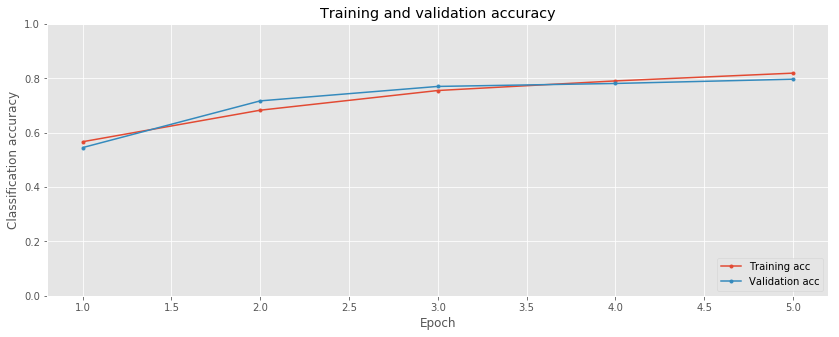

In [96]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### The TensorFlow embedding projector

The Tensorflow embedding projector can be found [here](https://projector.tensorflow.org/).

In [109]:
# Retrieve the embedding layer's weights from the trained model

weights = model.layers[1].get_weights()[0]

In [115]:
# Save the word Embeddings to tsv files
# Two files: 
#     one contains the embedding labels (meta.tsv),
#     one contains the embeddings (vecs.tsv)

import io
from os import path
import os
print(os.getcwd())
out_v = io.open(path.join('data', 'vecs.tsv'), 'w', encoding='utf-8')
out_m = io.open(path.join('data', 'meta.tsv'), 'w', encoding='utf-8')

k = 0

for word, token in word_index.items():
    if k != 0:
        out_m.write('\n')
        out_v.write('\n')
    
    out_v.write('\t'.join([str(x) for x in weights[token]]))
    out_m.write(word)
    k += 1
    
out_v.close()
out_m.close()
# beware large collections of embeddings!

/home/jovyan/work/3/tutorials


FileNotFoundError: [Errno 2] No such file or directory: 'data/vecs.tsv'

---
<a id="coding_tutorial_5"></a>
## Recurrent neural network layers

#### Initialize and pass an input to a SimpleRNN layer

In [117]:
# Create a SimpleRNN layer and test it

simplermm_layer = tf.keras.layers.SimpleRNN(16)

In [119]:
# Note that only the final cell output is returned

sequence = tf.constant([[[1., 1.], [2., 2.], [3., 3.]]])
layer_output = simplermm_layer(sequence)
layer_output

<tf.Tensor: id=13384, shape=(1, 16), dtype=float32, numpy=
array([[ 0.4715775 ,  0.9167975 , -0.96738577,  0.6617303 ,  0.11051562,
         0.8111362 ,  0.74418014, -0.75428593,  0.99029565,  0.7433237 ,
        -0.57945585,  0.00607975, -0.84859496, -0.97033787,  0.97759694,
         0.96718395]], dtype=float32)>

#### Load and transform the IMDB review sentiment dataset

In [120]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [122]:
# Load the dataset

(x_train, y_train),(x_test, y_test) = get_and_pad_imdb_dataset()

In [123]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [125]:
# Get the word index using get_imdb_word_index()

word_index = get_imdb_word_index()

#### Create a recurrent neural network model

In [127]:
# Get the maximum index value

max_index_value = max(word_index.values())
embedding_dim = 16

In [128]:
# Using Sequential, build the model:
# 1. Embedding.
# 2. LSTM.
# 3. Dense.

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
    tf.keras.layers.LSTM(16),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#### Compile and fit the model

In [129]:
# Compile the model with binary cross-entropy loss

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [132]:
# Fit the model and save its training history

history = model.fit(x_train, y_train, epochs=3, batch_size=32)

Train on 25000 samples
Epoch 1/3
18848/25000 [=====================>........] - ETA: 24:36 - loss: 0.4566 - accuracy: 0.7849

KeyboardInterrupt: 

#### Plot learning curves

In [ ]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### Make predictions with the model

In [133]:
# View the first test data example sentence
# (invert the word index)
inv_imdb_word_index = {value:key for key, value in word_index.items()}
[inv_imdb_word_index[index]for index in x_test[0] if index > 2]

['please',
 'give',
 'this',
 'one',
 'a',
 'miss',
 'br',
 'br',
 'and',
 'the',
 'rest',
 'of',
 'the',
 'cast',
 'rendered',
 'terrible',
 'performances',
 'the',
 'show',
 'is',
 'flat',
 'flat',
 'flat',
 'br',
 'br',
 'i',
 "don't",
 'know',
 'how',
 'michael',
 'madison',
 'could',
 'have',
 'allowed',
 'this',
 'one',
 'on',
 'his',
 'plate',
 'he',
 'almost',
 'seemed',
 'to',
 'know',
 'this',
 "wasn't",
 'going',
 'to',
 'work',
 'out',
 'and',
 'his',
 'performance',
 'was',
 'quite',
 'so',
 'all',
 'you',
 'madison',
 'fans',
 'give',
 'this',
 'a',
 'miss']

In [ ]:
# Get the model prediction using model.predict()

model.predict(x_test[None, o, :])

In [134]:
# Get the corresponding label

y_test[0]

0

---
<a id="coding_tutorial_6"></a>
## Stacked RNNs and the Bidirectional wrapper

#### Load and transform the IMDB review sentiment dataset

In [135]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [139]:
# Load the dataset

(x_train, y_train), (x_test, y_test)= get_and_pad_imdb_dataset(num_words=5000, maxlen=250)

In [140]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [141]:
# Get the word index using get_imdb_word_index()

word_index = get_imdb_word_index(num_words=5000)

#### Build stacked and bidirectional recurrent models

In [142]:
# Get the maximum index value and specify an embedding dimension

max_index_value = max(word_index.values())
embedding_dim = 16

In [144]:
# Using Sequential, build a stacked LSTM model via return_sequences=True

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim = embedding_dim, mask_zero=True),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.LSTM(32, return_sequences=False),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [146]:
# Using Sequential, build a bidirectional RNN with merge_mode='sum'

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim = embedding_dim, mask_zero=True),
    tf.keras.layers.Bidirectional(layer = tf.keras.layers.LSTM(8), merge_mode='sum', backward_layer=tf.keras.layers.GRU(8, go_backwards=True)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [148]:
# Create a model featuring both stacked recurrent layers and a bidirectional layer

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim),
    tf.keras.layers.Bidirectional(layer = tf.keras.layers.LSTM(8, return_sequences=True), merge_mode='concat'),
    tf.keras.layers.GRU(8, return_sequences=False),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#### Compile and fit the model

In [149]:
# Compile the model

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [150]:
# Train the model, saving its history

history = model.fit(x_train, y_train, epochs=3, batch_size=32)

Train on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 974s 39ms/sample - loss: 0.3985 - accuracy: 0.8142
Epoch 2/3
25000/25000 [==============================] - 849s 34ms/sample - loss: 0.2516 - accuracy: 0.9024
Epoch 3/3
19968/25000 [======================>.......] - ETA: 3:00 - loss: 0.1940 - accuracy: 0.9277

KeyboardInterrupt: 

In [ ]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);